Compares the average sentiment score obtained using 10 randomly sampled reviews (used in main.py) versus 100 randomly sampled reviews

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [15]:
N_100 = pd.read_csv("../output/avg_sentiment_per_game_N100.csv")
N_10 = pd.read_csv("../output/avg_sentiment_per_game_N10.csv")

In [20]:
sentiment_diff = pd.merge(N_100, N_10, on='app_name', suffixes=('_N100', '_N10'))
sentiment_diff['sentiment_difference'] = sentiment_diff['avg_sentiment_N100'] - sentiment_diff['avg_sentiment_N10']

sentiment_diff.head()

,app_name,avg_sentiment_N100,avg_sentiment_N10,sentiment_difference,pos_to_neg,neg_to_pos
0,神明的一天世界-God's One Day World,0.138,-0.006,0.144,True,False
1,! That Bastard Is Trying To Steal Our Gold !,-0.503,-0.779,0.276,False,False
2,"!""We Are The Dwarves""!",0.193,0.199,-0.006,False,False
3,"""Glow Ball"" - The billiard puzzle game",-0.907,-0.999,0.092,False,False
4,#SelfieTennis,0.193,0.219,-0.026,False,False


In [19]:
avg_diff = round(np.average(sentiment_diff['sentiment_difference']), 3)
max_diff = round(np.max(sentiment_diff['sentiment_difference']), 3)
min_diff = round(np.min(sentiment_diff['sentiment_difference']), 3)

print("Average difference: {}, min: {}, max: {}".format(avg_diff, min_diff, max_diff))

Average difference: 0.011, min: -0.946, max: 0.917


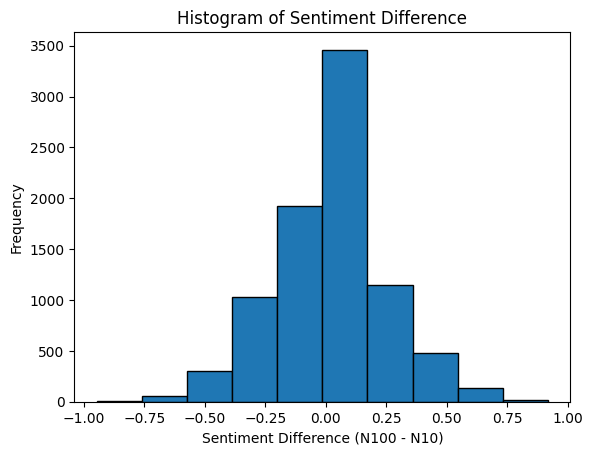

In [16]:
plt.hist(sentiment_diff['sentiment_difference'], bins=10, edgecolor='black')
plt.xlabel('Sentiment Difference (N100 - N10)')
plt.ylabel('Frequency')
plt.title('Histogram of Sentiment Difference')
plt.show()

In [23]:
sentiment_diff.to_csv("../output/Sentiment_difference_from_N100_to_N10.csv")